# Lab 1 - Music taste prediction

## 0 - About

#### 0.1 These are all the libraries I have used
 - pandas
 - matplotlib
 - scikit-learn
 - jupyter notebook
 - numpy
 - seaborn

#### 0.2 For conda installation run following in a project directory to create a directory (.env) + the libraries installed:

``` conda create --prefix ./env pandas matplotlib scikit-learn jupyter numpy seaborn ```

#### 0.3 Ex project directory/folder structure:

- lab-1
    - music-taste-prediction.ipynb
    - .env
 
Run ```jupyter notebook``` from lab-1 to start the notebook locally :)

In [19]:

import numpy as np


with open('/Users/ericportela/Desktop/test/test_2/text1.txt', 'r') as file:
    for line in file:
        data = line.split()
        data = np.array(data, dtype=float)

        if (data[0] != 0):

            point1 = np.array(data[:2])
            point2 = np.array(data[2:4])
            p = data[4]

            print(point1)
            print(point2)
            

            distance = np.linalg.norm(point1 - point2, ord=p)   

            print(distance)

[1. 1.]
[2. 2.]
1.4142135623730951
[1. 1.]
[2. 2.]
2.0
[1. 1.]
[20. 20.]
20.363695788189574


In [1]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
import matplotlib.pyplot as plt

# Instructions

2.2 What to do
First, get to know the data. The preprocessing consists of different elements, such as

1. Exploring the data by printing or plotting some information.
2. Data normalisation, outlier detection and encoding of categorical variables.
3. Feature selection.

For the methods you decide to explore, you should

1. Implement the method. We suggest that you use python and sklearn, but you may write your own implementation or use other packages.
2. Tune the method to perform well.
3. Evaluate its performance using, e.g., cross validation. Note that each model needs to be evaluated using only the labeled data that is available in training_data.csv, i.e. for the purpose of model validation and selection you should not use the test data from songs_to_classify.csv. (We know it might be possible to cheat here...). Exactly how to carry out the evaluation is up to you to decide.

# 1.0 - Exploratory Data Analysis (trying to understand the data)

### 1.1 Import data

This table was generated by ChatGPT, inputting the information provided from the lab instructions taken from Spotify API

| Feature           | Description                                                                                                                                                                                                                                 | Values                                                                                                                                                                                                                          | Interpretation of Value Ranges                                                                                                                                                              |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **acousticness**   | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                | 0.0 to 1.0                                                                                                                                                                                                                       | Higher values represent more acoustic tracks; 1.0 means the track is likely to be acoustic.                                                                                                |
| **danceability**   | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.                                                              | 0.0 to 1.0                                                                                                                                                                                                                       | Higher values indicate more danceable tracks; 1.0 is the most danceable.                                                                                                                   |
| **duration**       | Duration of the track in milliseconds.                                                                                                                                                                                                     | Integer values (milliseconds)                                                                                                                                                                                                    | N/A                                                                                                                                                                                        |
| **energy**         | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.                                                                                   | 0.0 to 1.0                                                                                                                                                                                                                       | Higher values represent more energetic tracks; 1.0 represents maximum energy (e.g., fast, loud music like death metal).                                                                    |
| **instrumentalness**| Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.                                                                                   | 0.0 to 1.0                                                                                                                                                                                                                       | Values above 0.5 indicate a higher likelihood of being instrumental; 1.0 indicates very high confidence that the track has no vocals.                                                      |
| **key**            | The key the track is in. Integers map to pitches using standard Pitch Class notation.                                                                                                                                                        | Integer values (0 = C, 1 = C major/D minor, 2 = D, etc.)                                                                                                                                                                        | N/A                                                                                                                                                                                        |
| **liveness**       | Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live.                                                                                                     | 0.0 to 1.0                                                                                                                                                                                                                       | Values above 0.8 indicate a high likelihood that the track is live.                                                                                                                        |
| **loudness**       | The overall loudness of a track in decibels (dB), averaged across the entire track. Useful for comparing relative loudness of tracks.                                                                                                       | -60 to 0 dB                                                                                                                                                                                                                      | Higher values represent louder tracks; 0 dB is maximum loudness.                                                                                                                           |
| **mode**           | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.                                                                                                                        | 0 = minor, 1 = major                                                                                                                                                                                                             | 0 represents minor key; 1 represents major key.                                                                                                                                             |
| **speechiness**    | Speechiness detects the presence of spoken words in a track.                                                                                                                                                                                | 0.0 to 1.0                                                                                                                                                                                                                       | Values above 0.66 likely represent spoken-word tracks; 0.33–0.66 may have both music and speech (e.g. rap); below 0.33 most likely represent music tracks.                                  |
| **tempo**          | The overall estimated tempo of a track in beats per minute (BPM).                                                                                                                                                                           | Integer values (BPM)                                                                                                                                                                                                             | Higher values represent faster tempos.                                                                                                                                                      |
| **time_signature** | An estimated overall time signature of a track. The time signature specifies how many beats are in each bar (measure).                                                                                                                       | Integer values (e.g., 3, 4, 5)                                                                                                                                                                                                   | Common time signatures: 4 represents 4/4 time (common in popular music); 3 represents 3/4 time (common in waltzes).                                                                         |
| **valence**        | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed). | 0.0 to 1.0                                                                                                                                                                                                                       | Higher values indicate more positive, happy tracks; lower values indicate more negative, sad tracks.                                                                                        |


In [43]:
final_test_df = pd.read_csv("songs_to_classify.csv")
df = pd.read_csv("training_data.csv")
df.shape

(750, 14)

In [44]:
df.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
45,0.263,0.579,86813,0.141,0.000000,0,0.2960,-9.288,1,0.1050,128.824,4,0.737,0
214,0.166,0.708,213440,0.666,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
283,0.142,0.662,282387,0.948,0.000012,8,0.0675,-3.869,1,0.0914,88.987,4,0.839,0
274,0.737,0.306,353920,0.377,0.000000,1,0.0365,-8.090,1,0.0344,85.714,4,0.245,1
422,0.529,0.567,214133,0.456,0.000000,2,0.1770,-6.062,1,0.0261,90.035,4,0.313,1


In [45]:
# see what type the features are (seems like we only have numerical values, no need to encode categorical features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


In [46]:
# here I check how many misisng values are present in the training datset (apparently 0, perfect!)
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

### 1.2 Some plots

#### 1.2.1 Target Class Distribution

Checking for class imbalance, since it affects the models capabillity of generalizing well

Clearly it will learn to predict the majority class better than the minority class if this issue is present and not addressed

I have to deal with this, I will go for undersampling the majority class

label
1    452
0    298
Name: count, dtype: int64


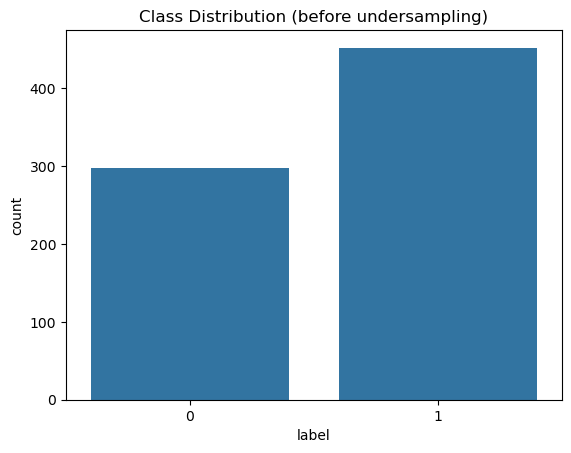

In [47]:
class_counts = df['label'].value_counts()
print(class_counts)

sns.countplot(x='label', data=df, legend='auto')
plt.title('Class Distribution (before undersampling)')
#plt.savefig('class_imbalance.png', transparent=True)
plt.show()

#### 1.2.2 Pairwise correlation matrix between features

### Why?
- To detect potential multicolinearity between 2 features and remove one of the features that show high colinearity/correlation
- I argue that a high correlation would be ≥0.7 and ≤-0.7
- It seems that following features show a high correlation, potentially indicating multicolinearity
    - acousticness/energy: -0.78
    - acousticness/loudness: -0.70
    - energy/loudness: 0.83

In [48]:
def print_corr_matrix (df, save_img):
    corr_matrix = df.corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})  # Increase the annotation size
    plt.title('Correlation Matrix')

    if save_img:
        plt.savefig('correlation_matrix_corrected.png', transparent=True)
        
    plt.show()

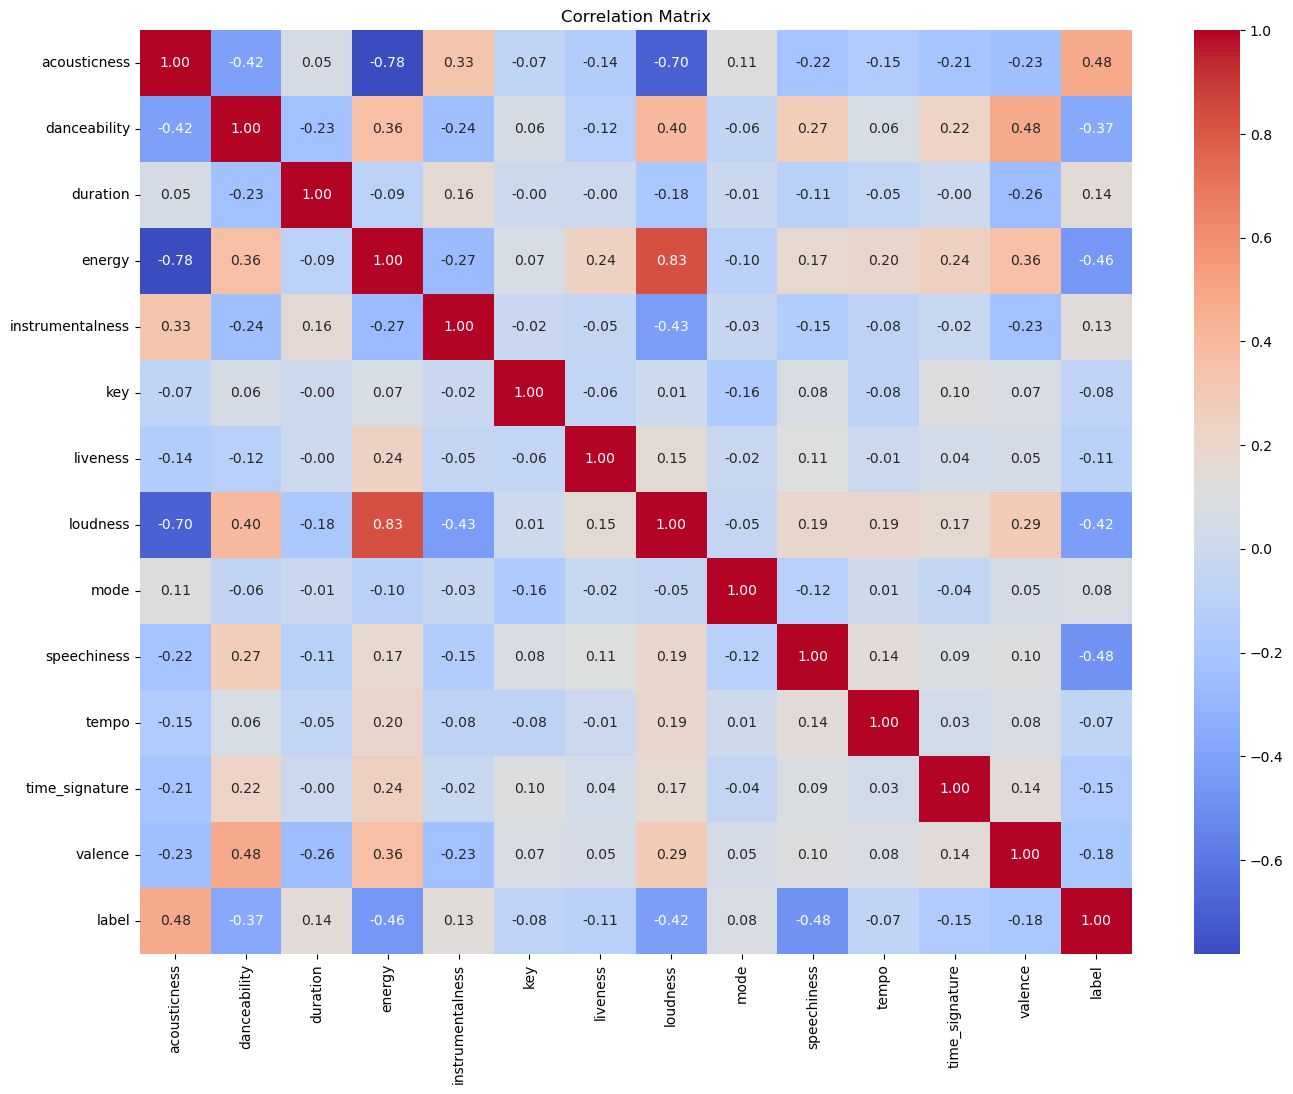

In [50]:
print_corr_matrix(df, False)

Here I decide to drop energy and loudness

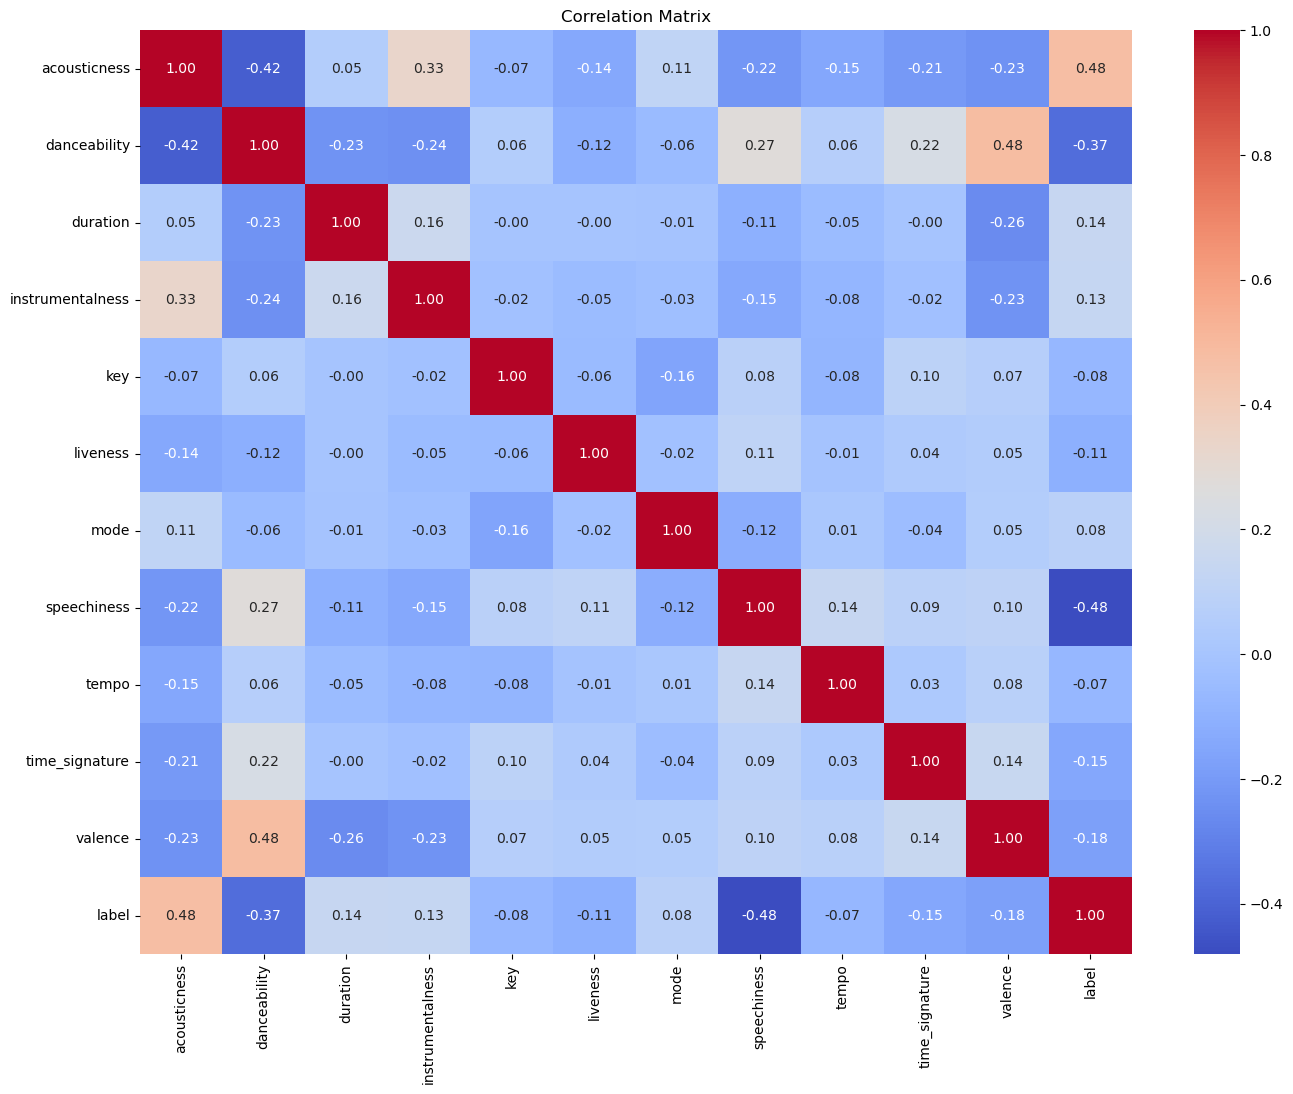

In [51]:
columns_to_drop = ['energy', 'loudness']

df = df.drop(columns_to_drop, axis=1)
final_test_df = final_test_df.drop(columns_to_drop, axis=1)

print_corr_matrix(df, False)

#### 1.2.3 - Histogram of the features to understand how to scale/normalize data

- Here I plot the frequency distrubution for each feature in order to apply relevant scaling of each feature
- I will use 3 different types of scaling
    - ***Linear*** (data with low frequency of outliers)
    - ***Z-scaling*** (data which is normally distributed or close to normally distributed)
    - ***log-scaling*** (high values on y for low x values, but quick decrease on x values as y increases)
 
Source: https://developers.google.com/machine-learning/crash-course/numerical-data/normalization

Note that the last plot (lower right corner in histogram) is just the distribution of the target variable, no need to scale it!

In [10]:
len(df.columns)

12

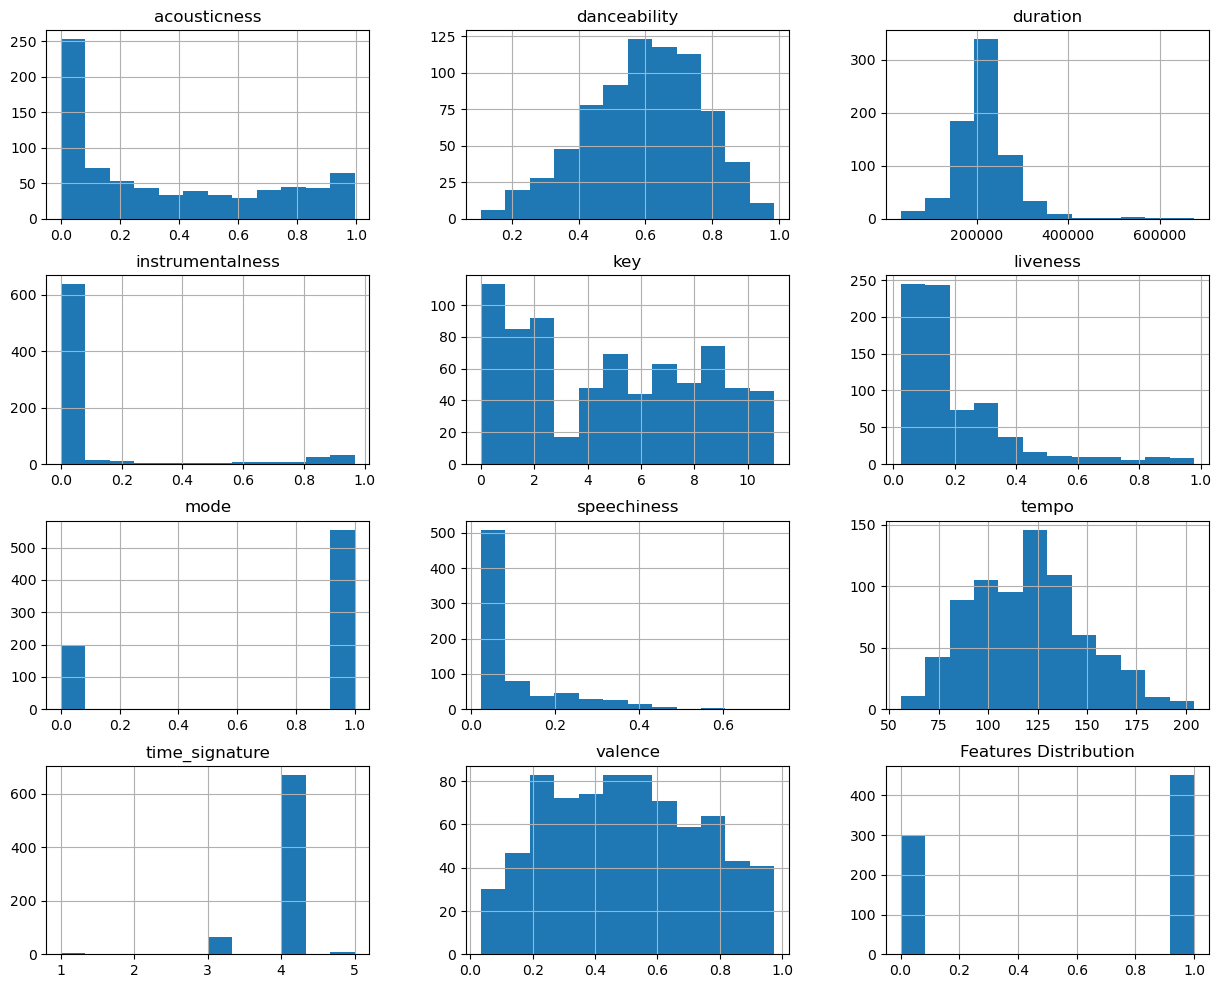

In [52]:
df.hist(figsize=(15,12),bins = len(df.columns))
plt.title("Features Distribution")
#plt.savefig("feature-distribution-before-scaling.png", transparent=True)
plt.show()

In [53]:
columns_to_linear_scale = ['key']
columns_to_z_scale = ['danceability', 'duration', 'tempo', 'valence']
columns_to_log_scale = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']


# define a dict to basically map each column to corresponding scaling process
columns_to_scale = {
    
    'linear': columns_to_linear_scale,
    'z': columns_to_z_scale,
    'log': columns_to_log_scale
    
}

# mode, time_signature not needed
# should one-hot encode time_signature, though since it's a categorical variable!
# train = pd.get_dummies(train, columns=['time_signature'], drop_first=True)

In [54]:
linear_scaler = MinMaxScaler()
z_scaler = StandardScaler()

# define the function to handle the scaling 
def normalization(df, column_name, normalization_type):
    
    match normalization_type:
        case 'linear':
            df[column_name] = linear_scaler.fit_transform(df[[column_name]])
        case 'z':
            df[column_name] = z_scaler.fit_transform(df[[column_name]])
        case 'log':
            df[column_name] = np.log(df[column_name] + 1) # here I decide to add with 1 to avoid log0

In [55]:
for key in columns_to_scale:
    for column in columns_to_scale[key]:
        normalization(df, column, key)

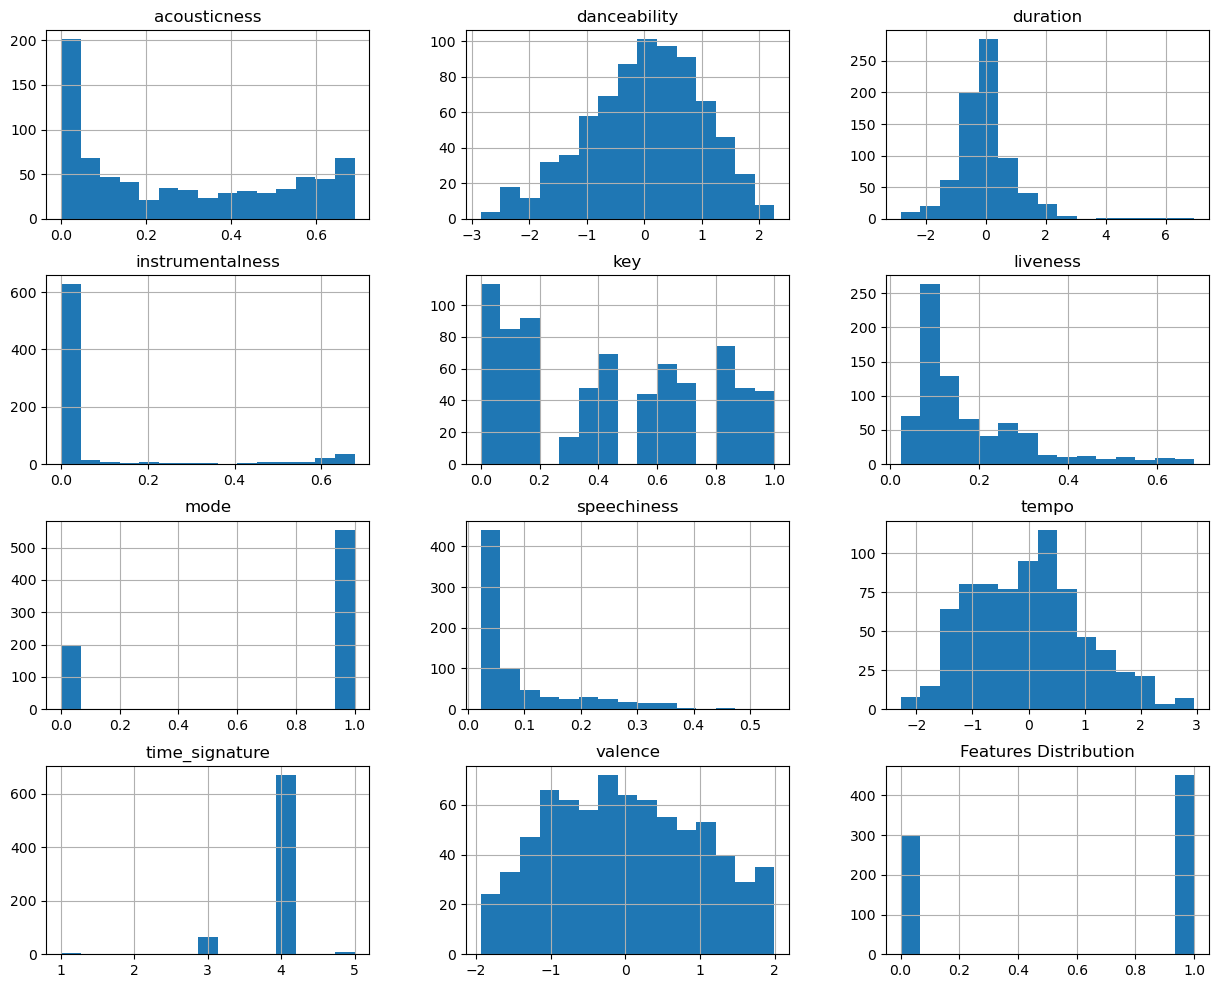

In [56]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
#plt.savefig("feature-distribution-after-scaling.png", transparent=True)
plt.show()

In [57]:
df_encoded = pd.get_dummies(df, columns=['time_signature'], prefix='ts')

In [58]:
df = df_encoded

# 2.0 Model training

- I train the model using k-fold cross validation, with k=10
- The original training_data.csv is split using a 80-20 ratio
    - 80% used for training in the GridSearchCV (see below)
    - 20% is used for evaluating the performance of final model on new unseen data
- Since I'm interested in tuning the hyperparameters of the model I leveraged the GridSearchCV object 
- The main take away is that GridSearchCV is used to both fit and test the model, but also tune the hyperparameters using an approach called 'Grid Search'
    - The grid search is a greedy approach of finding the optimal hyperparameters (a.k.a. model-tuning) for the model given a predefined parameter grid
    - So basically the predefined parameter grid is the limitation itself, you find the most optimal hyperparams given the grid

## 2.1 Splitting the data into X (predictors) and y (target) matrix

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X = df.drop('label', axis=1)
y = df['label']

In [66]:
# Here I perform a random undersampling of the majority class!

rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_resample(X, y)

## 2.2 PCA for dimensionality reduction (I will only apply it to the KNN)

- The reason why I do this is because KNN doesn't handle high dimensionality data quite well
- I tested on the non-PCA transformed data and it indeed performed worse (in terms of accuracy, precision and recall)
- Last row prints the explained variance ratio for each component

In [67]:
from sklearn.decomposition import PCA

n_comps = len(df.columns) - 1

pca_evaluation = PCA(n_components = n_comps)

pca_evaluation.fit(X)

print(pca_evaluation.explained_variance_ratio_)

[3.54808169e-01 2.18059318e-01 1.83012689e-01 1.19885615e-01
 4.42657189e-02 2.99878288e-02 2.22844821e-02 1.08096221e-02
 5.75279793e-03 4.44864444e-03 3.34061239e-03 1.77951200e-03
 1.56498949e-03 3.56359872e-18]


- Looks to me like the first 4 components seem to be holding the most important information in terms of explained variance
    - The first four components are each >0.10
    - Then on the fifth it drops severely to 0.042
- I decide to choose the first 4 components to train the models on
- So I redo the PCA-fit below using only 4 components

In [68]:
pca = PCA(n_components = 4)

pca.fit(X)

print(pca.explained_variance_ratio_)

X_pca = pca.fit_transform(X)

[0.35480817 0.21805932 0.18301269 0.11988562]


## 2.3 KNN + GridSearchCV

- Here I finally train and test the model using the PCA transformed X values
 
- The hyperparameters I decided to tune were
    - **'#' of neighbours** (the range is from 1 - total amount of features)
    - **weights**
    - **distance metric**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [70]:
knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': np.arange(1, len(df.columns)),
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV object with KNN and the hyperparameter grid
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=0, n_jobs=-1)

# here I fit
grid_search.fit(X_train, y_train)

# obtain the best model and also perform predictions
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(f"Test accuracy with best KNN: {test_accuracy:.2f}")

# classification report
print(classification_report(y_test, y_test_pred))

Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Test accuracy with best KNN: 0.70
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        69
           1       0.63      0.73      0.67        51

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.71      0.70      0.70       120



## 2.4 Redefine the train and test set based of the original data, not the PCA transformed

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.5 Logistic Regression + GridSearchCV

Why this model?
- Produces linear decision boundary (I want to test if this might be suitable)
- It is a highly interpretable model
    - Particularly speaking about the the log odds / regression coefficients
    - To be precise, a one-unit increase in feature 1 is associated with an increase in the log odds of the target by the coefficient

#### 2.5.1 Model fitting + hyperparameter tuning using GridSearchCV (k = 10)

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000) # the logistic regression model

# the hyperparameter grid/space we want to search within to tune the hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 200, 300],  # Inverse regularization strength
    'penalty': ['l2'],  # l2 regularization
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# the grid search object with the logistic regression
grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', verbose=0, n_jobs=-1, error_score='raise')


grid_search.fit(X_train, y_train) # here the grid search is perfomed on the training data

best_log_reg = grid_search.best_estimator_ # returns the model with the optimal hyperparameters given the parameter grid I fed in the start 

y_test_pred = best_log_reg.predict(X_test) # here the predictions are performed in test set (20%) of original data

# here I decided to print the most optimal hypeparameter settings given the grid I defined in the start
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# this prints a classification report containing precision recall and f1, apart from accuarcy
print(classification_report(y_test, y_test_pred))

Best Parameters from GridSearchCV: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        69
           1       0.81      0.76      0.79        51

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120



#### 2.5.1 Plot of log odds coefficients

- The log odds coefficients can be seen as a direct translation of the 

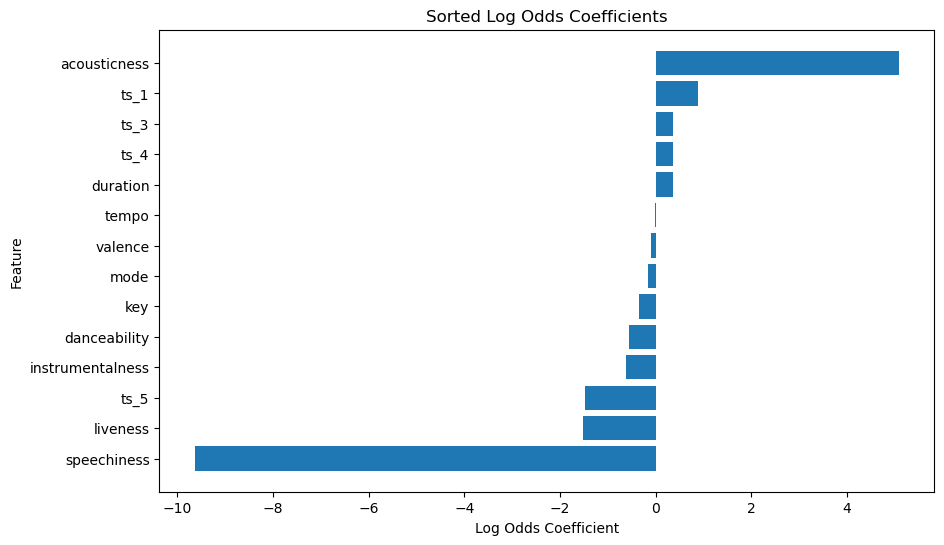

In [37]:
log_odds_coefficients = best_log_reg.coef_[0]

coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Log Odds Coefficient': log_odds_coefficients
})

# here I sort the dataframe based in the value so of the coefficients in descending order
sorted_coefficients_df = coefficients_df.sort_values(by='Log Odds Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients_df['Feature'], sorted_coefficients_df['Log Odds Coefficient'])
plt.xlabel('Log Odds Coefficient')
plt.ylabel('Feature')
plt.title('Sorted Log Odds Coefficients')
plt.gca().invert_yaxis()  # inverts y axis
plt.savefig('log-odds.png', transparent=True)

plt.show()

## 2.6 RandomForestClassifier + GridSearchCV

### 2.6.1 Model fitting + hyperparameter tuning using GridSearchCV (k = 10)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],  # Number of trees
    'max_depth': [5, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [40, 60, 80, 100],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [20, 30, 40, 50]    # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', verbose=0, n_jobs=-1, error_score='raise')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_test_pred = best_rf.predict(X_test)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(classification_report(y_test, y_test_pred))

Best Parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 80, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        69
           1       0.77      0.78      0.78        51

    accuracy                           0.81       120
   macro avg       0.80      0.81      0.80       120
weighted avg       0.81      0.81      0.81       120



/Users/ericportela/Documents/GitHub/FRTN65/env/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


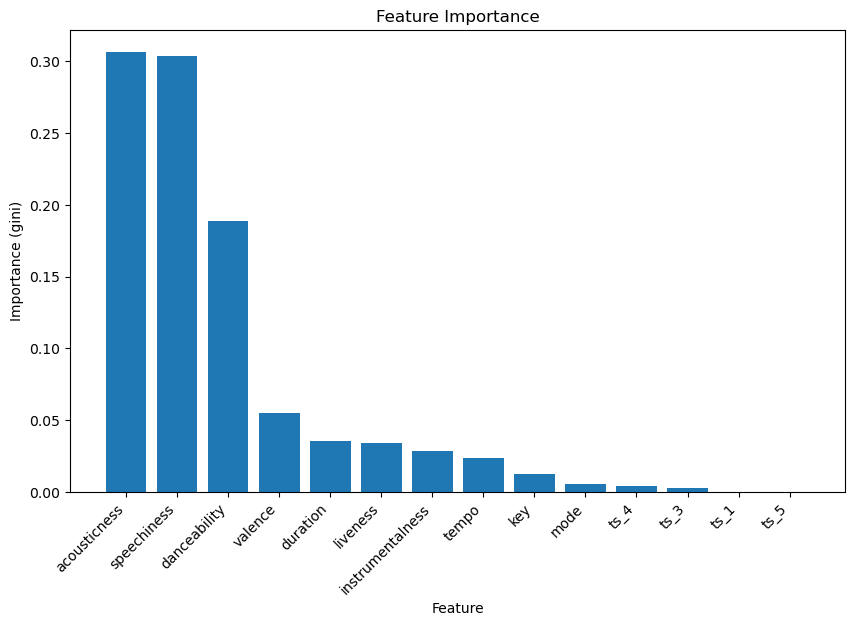

In [63]:
feature_importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel(f'Importance ({best_rf.criterion})')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.savefig('feature-importance.png', transparent=True)

plt.show()

## 2.7 SVC

### 2.7.1 Model fitting + hyperparameter tuning using GridSearchCV (k = 10)

In [144]:
final_preds = best_rf.predict(final_test_df)

In [74]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 7, 10],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}

grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', verbose=0, n_jobs=-1, error_score='raise')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_test_pred = best_rf.predict(X_test)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(classification_report(y_test, y_test_pred))

Best Parameters from GridSearchCV: {'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        69
           1       0.69      0.73      0.70        51

    accuracy                           0.74       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.74      0.74      0.74       120

